In [35]:
# %matplotlib inline

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Sample


In [37]:
df=pd.read_csv('sample_grid.xlsx.csv')
df.head()

,x,y,n
0,-1,990,10
1,-7,2001,10
2,1,2995,16
3,-6,3996,12
4,-7,5006,11


In [38]:
for index, row in df.iterrows():
    curx = row['x']
    cury = row['y']    
    if index==0: 
        X = np.array([curx,cury], dtype='int64')
    else:
        oldX = X
        newX = np.array([curx,cury], dtype='int64')
        X=np.vstack((X,newX))

In [39]:
nobs = X.shape[0]

# Sample Viz

We can visualize the resulting data:



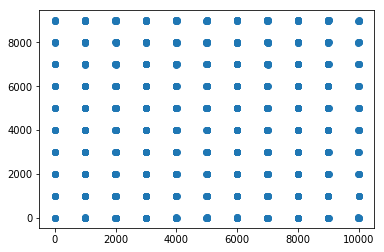

In [40]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Distance matrix

In [41]:
# Distance matrix
from scipy.spatial import distance_matrix

In [42]:
dist_mat = distance_matrix(X, X, p=2)

In [44]:
dist_mat

array([[     0.        ,   1011.017804  ,   2005.00099751, ...,
         12204.09804123,  12808.12277424,  10051.57589635],
       [  1011.017804  ,      0.        ,    994.03219264, ...,
         11658.82198166,  12206.88740015,  10206.47270118],
       [  2005.00099751,    994.03219264,      0.        , ...,
         11173.63190731,  11659.15983251,  10438.96857932],
       ..., 
       [ 12204.09804123,  11658.82198166,  11173.63190731, ...,
             0.        ,   1003.00448653,   7987.00225366],
       [ 12808.12277424,  12206.88740015,  11659.15983251, ...,
          1003.00448653,      0.        ,   8990.00050056],
       [ 10051.57589635,  10206.47270118,  10438.96857932, ...,
          7987.00225366,   8990.00050056,      0.        ]])

In [45]:
# df_describe = pd.DataFrame(dist_mat)
df_describe = pd.DataFrame(dist_mat.flatten())
df_describe.describe()

,0
count,1000000.000000
mean,5224.048288
std,2491.278684
min,0.000000
25%,3164.818162
50%,5092.548380
75%,7073.621562
max,13462.993575


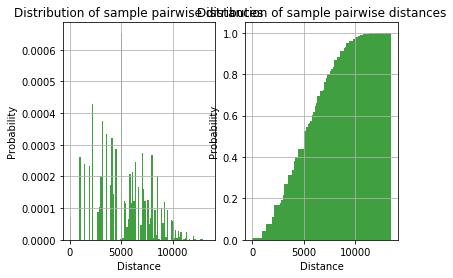

In [49]:
plt.subplot(1,2,1)
n, bins, patches = plt.hist(dist_mat.flatten(), 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Distribution of sample pairwise distances')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(dist_mat.flatten(), bins=bins, density=True, facecolor='g', alpha=0.75, cumulative=True)
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Distribution of sample pairwise distances')
plt.grid(True)
plt.show()

# Neighbors at $\epsilon$ 

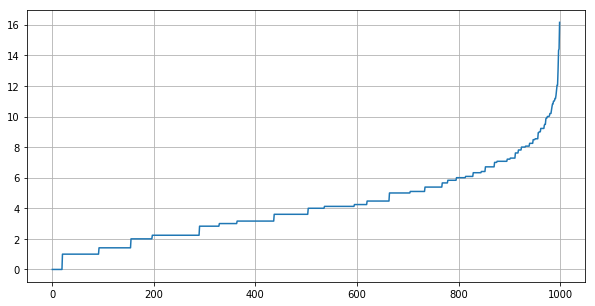

In [58]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(X)
distances, idx = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(True)
plt.show()

In [50]:
print('pctile','\t','eps','\t\t','count','\t\t','mean','\t','std','\t\t','min','\t','25%','\t','50%','\t','75%','\t','max')
for i in range(1, 20, 1):   
    cureps = np.percentile(dist_mat.flatten(), i, axis=0)
    curN = np.count_nonzero(dist_mat <= cureps, axis=0)
    df_describe = pd.DataFrame(curN).describe().transpose()
    print(i, '\t', cureps, '\t', df_describe['count'].values[0], '\t', 
          df_describe['mean'].values[0],'\t',  df_describe['std'].values[0],'\t',  
          df_describe['min'].values[0], '\t', df_describe['25%'].values[0], '\t', df_describe['50%'].values[0], '\t', 
          df_describe['75%'].values[0], '\t', df_describe['max'].values[0])


pctile 	 eps 		 count 		 mean 	 std 		 min 	 25% 	 50% 	 75% 	 max
1 	 983.002034586 	 1000.0 	 10.018 	 1.82016180297 	 4.0 	 10.0 	 10.0 	 11.0 	 15.0
2 	 995.060802162 	 1000.0 	 20.044 	 4.30076278822 	 6.0 	 18.0 	 21.0 	 23.0 	 30.0
3 	 1002.00449101 	 1000.0 	 30.02 	 5.86395651297 	 9.0 	 28.0 	 32.0 	 34.0 	 44.0
4 	 1010.02425713 	 1000.0 	 40.048 	 7.58150217142 	 16.0 	 37.0 	 42.0 	 45.0 	 50.0
5 	 1405.73966295 	 1000.0 	 50.004 	 9.82580940842 	 19.0 	 45.0 	 54.0 	 57.0 	 62.0
6 	 1413.52785611 	 1000.0 	 60.022 	 12.6561326516 	 20.0 	 53.0 	 66.0 	 69.0 	 74.0
7 	 1421.28744454 	 1000.0 	 70.062 	 15.2577506519 	 23.0 	 59.0 	 78.0 	 81.0 	 88.0
8 	 1988.04929516 	 1000.0 	 80.012 	 17.8231175589 	 29.0 	 64.0 	 91.0 	 94.0 	 101.0
9 	 1998.01226222 	 1000.0 	 90.088 	 19.8941205393 	 32.0 	 75.0 	 100.5 	 106.0 	 113.0
10 	 2006.0 	 1000.0 	 100.046 	 21.7978675799 	 35.0 	 84.0 	 110.0 	 118.0 	 125.0
11 	 2220.42563487 	 1000.0 	 110.03 	 24.1641264068 	 44.0 	 92.

In [66]:
# neighbors
# myeps = 1000
myeps = 900
N = np.count_nonzero(dist_mat <= myeps, axis=0)

In [67]:
df_describe = pd.DataFrame(N)
df_describe.describe()

,0
count,1000.000000
mean,9.502000
std,1.498079
min,4.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


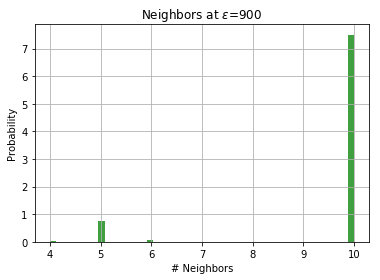

In [68]:
n, bins, patches = plt.hist(N, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('# Neighbors')
plt.ylabel('Probability')
plt.title('Neighbors at '+r'$\epsilon$='+str(myeps))
plt.grid(True)
plt.show()

In [69]:
# loop within percentiles
for i in range(1, 100, 1):   
    minpts = np.percentile(N, i, axis=0)    
    db = DBSCAN(eps=myeps, min_samples=minpts).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_share = (n_noise/nobs)*100
    cluster_share = 100-noise_share
    conc_coeff = (cluster_share/(100-i))-1
    try: 
        silhout=metrics.silhouette_score(X, labels)
    except:
        silhout=None        
    if i==1:
        curdata = {'pctile':[i],'neighbors':[minpts],'cluster_share':[cluster_share],'conc_coeff':[conc_coeff],
            'silhout':[silhout],'n_clusters':[n_clusters],'n_noise':[n_noise], 'noise_share':[noise_share]}
        df_pctiles = pd.DataFrame(curdata)
    else:
        curdata = {'pctile':i,'neighbors':minpts,'cluster_share':cluster_share,'conc_coeff':conc_coeff,
            'silhout':silhout,'n_clusters':n_clusters,'n_noise':n_noise, 'noise_share':noise_share}
        df_pctiles=df_pctiles.append(curdata, ignore_index=True)
df_pctiles.head()

,cluster_share,conc_coeff,n_clusters,n_noise,neighbors,noise_share,pctile,silhout
0,99.6,0.006061,109.0,4.0,5.0,0.4,1.0,0.989064
1,99.6,0.016327,109.0,4.0,5.0,0.4,2.0,0.989064
2,99.6,0.026804,109.0,4.0,5.0,0.4,3.0,0.989064
3,99.6,0.037500,109.0,4.0,5.0,0.4,4.0,0.989064
4,99.6,0.048421,109.0,4.0,5.0,0.4,5.0,0.989064


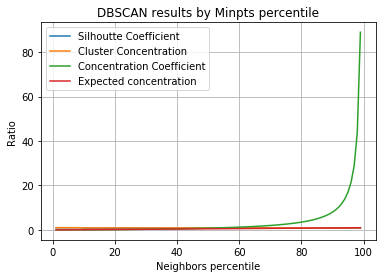

In [70]:
# plot lines
plt.plot(df_pctiles['pctile'], df_pctiles['silhout'], label = "Silhoutte Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['cluster_share']/100, label = "Cluster Concentration")
plt.plot(df_pctiles['pctile'], df_pctiles['conc_coeff'], label = "Concentration Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['pctile']/100, label = "Expected concentration")
plt.legend()
plt.xlabel('Neighbors percentile')
plt.ylabel('Ratio')
plt.title('DBSCAN results by Minpts percentile')
plt.grid(True)
plt.show()

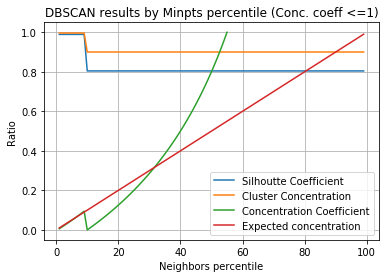

In [71]:
# plot lines
plt.plot(df_pctiles['pctile'], df_pctiles['silhout'], label = "Silhoutte Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['cluster_share']/100, label = "Cluster Concentration")
plt.plot(df_pctiles[df_pctiles['conc_coeff']<=1]['pctile'], df_pctiles[df_pctiles['conc_coeff']<=1]['conc_coeff'], label = "Concentration Coefficient")
plt.plot(df_pctiles['pctile'], df_pctiles['pctile']/100, label = "Expected concentration")
plt.legend()
plt.xlabel('Neighbors percentile')
plt.ylabel('Ratio')
plt.title('DBSCAN results by Minpts percentile (Conc. coeff <=1)')
plt.grid(True)
plt.show()

In [72]:
pd.set_option('display.max_rows', 100)
df_pctiles

,cluster_share,conc_coeff,n_clusters,n_noise,neighbors,noise_share,pctile,silhout
0,99.6,0.006061,109.0,4.0,5.0,0.4,1.0,0.989064
1,99.6,0.016327,109.0,4.0,5.0,0.4,2.0,0.989064
2,99.6,0.026804,109.0,4.0,5.0,0.4,3.0,0.989064
3,99.6,0.037500,109.0,4.0,5.0,0.4,4.0,0.989064
4,99.6,0.048421,109.0,4.0,5.0,0.4,5.0,0.989064
5,99.6,0.059574,109.0,4.0,5.0,0.4,6.0,0.989064
6,99.6,0.070968,109.0,4.0,5.0,0.4,7.0,0.989064
7,99.6,0.082609,109.0,4.0,5.0,0.4,8.0,0.989064
8,99.6,0.094505,109.0,4.0,5.0,0.4,9.0,0.989064
9,90.0,0.000000,90.0,100.0,9.6,10.0,10.0,0.804313


## Compute DBSCAN

One can access the labels assigned by :class:`~sklearn.cluster.DBSCAN` using
the `labels_` attribute. Noisy samples are given the label math:`-1`.



In [76]:
minpts = np.percentile(N, 9, axis=0)    
db = DBSCAN(eps=myeps, min_samples=minpts).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
conc_share_ = 1-n_noise_/nobs 

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"Concentration share:  %.3f percent" % conc_share_)

Estimated number of clusters: 109
Estimated number of noise points: 4
Silhouette Coefficient: 0.989
Concentration share:  0.996 percent


## Plot results

Core samples (large dots) and non-core samples (small dots) are color-coded
according to the asigned cluster. Samples tagged as noise are represented in
black.



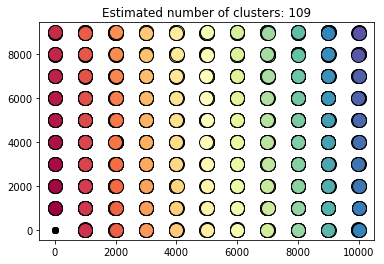

In [77]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()